# Štatistické testovanie hypotéz

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

## Vygenerujme si nejaké vzorky dát 
### Dve skupiny, každá skupina má 10 študentov
- Tí, ktorí chodili na prednášky (boli na aspoň 50% prednášok)
- Tí, ktorí nechodili na prednášky (ostatní)

In [2]:
np.random.seed(123)
sample_size = 10
m1 = 80 # mean
m2 = 78
s = 5 # standard deviation

attended = stats.norm(loc=m1, scale=s)
not_attended = stats.norm(loc=m2, scale=s)

# rvs: Random Variates
a_sample = attended.rvs(size=sample_size)
na_sample = not_attended.rvs(size=sample_size)

### Ako vyzerajú naše "namerané" dáta?

In [3]:
a_sample

array([74.57184698, 84.98672723, 81.41489249, 72.46852643, 77.10699874,
       88.25718269, 67.86660378, 77.85543686, 86.32968129, 75.66629799])

In [4]:
na_sample

array([74.60556924, 77.52645516, 85.45694813, 74.80549002, 75.7800902 ,
       75.82824362, 89.02965041, 88.93393044, 83.02026949, 79.930932  ])

In [5]:
a_sample.mean()

78.65241944836836

In [6]:
na_sample.mean()

80.49175787118455

Študenti, čo *nechodili* na prednášky, majú v priemere vyššie finálne hodnotenie.

### Teoreticky by sme mali pozorovať rozdiel

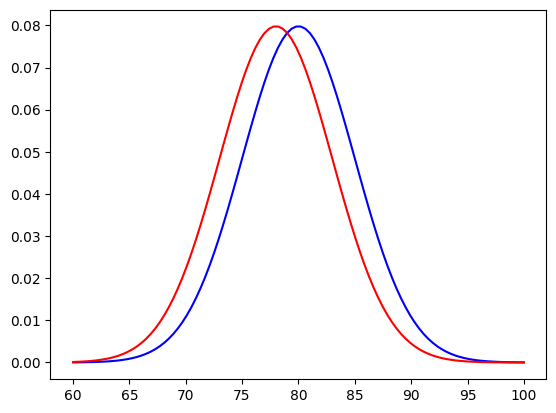

In [7]:
# pdf: Probability Density Function
x = np.linspace(60, 100, 100)
plt.plot(x, attended.pdf(x), 'b')
plt.plot(x, not_attended.pdf(x), 'r')

##  Môžem teda prehlásiť, že nechodenie na prednášky zlepšuje finálne hodnotenie na predmete?

<AxesSubplot: xlabel='attended', ylabel='score'>

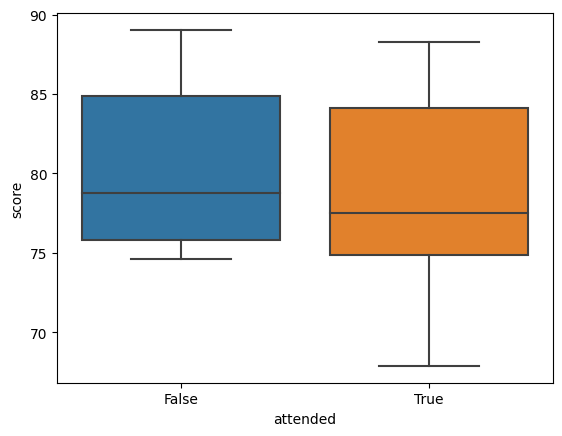

In [8]:
df = pd.DataFrame({'attended': np.repeat([True, False], 10), 'score': np.concatenate((a_sample, na_sample))})
sns.boxplot(x=df['attended'], y=df['score'])

### Základný problém je, že nemeriame populácie, ale len ich vzorky

Pracujeme teda len s odhadmi. **Ako si nimi môžeme byť istí?**

<img src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png" width="50%" />

### Štatistika nám ponúka nástroje, ako zistiť, či sú v dvoch štatistických súboroch odlišnosti
- Je tam vôbec nejaký rozdiel? Nejaký asi bude
- Je ten rozdiel malý alebo veľký? Tu nám štatistika veľmi nepomôže
- Má nameraný rozdiel nejakú praktickú hodnotu? Ani na toto nám štatistika nedá odpoveď
- Je nameraný rozdiel skutočný, alebo len kvôli náhode? Tu nám štatistika vie pomôcť!

## Ako teda overiť, či je rozdiel medzi skupinami skutočný, a nie daný náhodou?
- Štatistické testovanie hypotéz
- Pri testovaní hypotéz uvažujeme pravdepodobnosť, že daný výsledok sme mohli dosiahnuť, ak by experimentálna procedúra nemala žiadny efekt
- Predpoklad nulového efektu (rozdielu) = **nulová hypotéza** = $H_0$

**$H_0$ = Priemerné finálne hodnotenie študentov, čo chodili na prednášky, je rovnaké ako tých, čo na prednášky nechodili.**

- Alternatívna hypotéza $H_1$ (ak by neplatila nulová $H_0$)

**$H_1$ = Priemerné finálne hodnotenie študentov, čo chodili na prednášky, je iné/väčšie/menšie ako tých, čo na prednášky nechodili.**

## Chyba 1. a 2. rádu

<img src="https://chemicalstatistician.files.wordpress.com/2014/05/pregnant.jpg" width="50%" />

## 4 basic steps of hypothesis testing
1. Determine the null hypothesis $H_0$ and alternate hypothesis $H_1$
2. Set a significance level 𝛼 
3. Compute p-value using suitable test statistic 𝑇  
4. Make a decision based on p-value and 𝛼 

<!-- <img src="https://i.stack.imgur.com/idDTA.png" /> //-->
[<img src="img/critical-p-values.png" />](https://www.geo.fu-berlin.de/en/v/soga/Basics-of-statistics/Hypothesis-Tests/Introduction-to-Hypothesis-Testing/Critical-Value-and-the-p-Value-Approach/index.html)

# Už si len potrebujeme vybrať vhodný štatistický test!

## Studentov t-test

- t-štatistika bola predstavená v roku 1908 Williamom Sealy Gossetom v čase, keď pracoval ako chemik v pivovare Guinness.
- t-test je založený na **t-distribúcii**.
- t-distribúcia je podobná ako normálna distribúcia, ale má viac hmoty na chvostoch. So zväčšujúcim počtom pozorovaní sa približuje normálnej distribúcii.
Výpočet t-štatitiky (pre dve nezávislé vzorky):

## $t = \frac{\overline{X_1} - \overline{X_2}}{s_p \sqrt{\frac{1}{n_1} - \frac{1}{n_2}}}$, 
## $s_p = \sqrt{\frac{(n_1 - 1) s^2_{X_1} + (n_2 - 1) s^2_{X_2}}{n_1 + n_2  - 2}}$

- t-test pre dve párové vzorky porovnáva, či je rozdiel dvojíc pozorovaní rôzny od nuly.

### Predpoklady t-testu
- Hodnoty v súboroch sú z normálneho rozdelenia
- Súbory pochádzajú z distribúcií s podobne veľkou varianciou (rozptylom hodnôt) - existuje korekcia t-testu pre distribúcie s rôznou varianciou (*Welchov t-test*).
- *t-test je odolný voči miernym odchýlkam od týchto predpokladov.*

In [9]:
# stats.ttest_ind(a_sample, na_sample)
stat, p = stats.ttest_ind(a_sample, na_sample)
print('Ttest_indResult: statistic=', stat, 'pvalue=', p)

Ttest_indResult: statistic= -0.6704597231719521 pvalue= 0.511076194122041


### Interpretácia

In [10]:
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Same distributions (fail to reject H0)


*t-test*: $H_0$ =  the means of two populations are equal

- Predpoklad nulového efektu (rozdielu) = **nulová hypotéza** = $H_0$

v doméne: **$H_0$ = Priemerné finálne hodnotenie študentov, čo chodili na prednášky, je rovnaké ako tých, čo na prednášky nechodili.**

#### Nemôžeme zamietať $H_0$ (fail to reject $H_0$) na základe výsledku *t-test*u s dvoma vzorkami (v každej je 10 študentov)

### Ideme ďalej s testami !!!

## Testovanie predpokladu normálnosti

1. Vizuálna kontrola pomocou histogramu alebo tzv. kvantil-kvantilového grafu (QQ grafu) - najmä pri veľkých vzorkách
2. Testom normálnosti, napr. pomocou **Shapiro-Wilkovho** testu.

<AxesSubplot: ylabel='Count'>

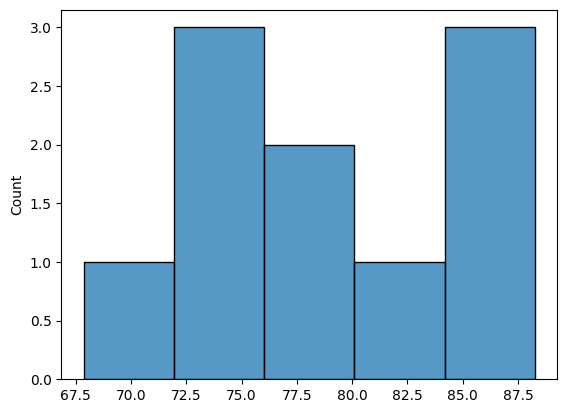

In [11]:
# sns.distplot(a_sample, bins=5)
sns.histplot(a_sample, bins=5)

<AxesSubplot: ylabel='Count'>

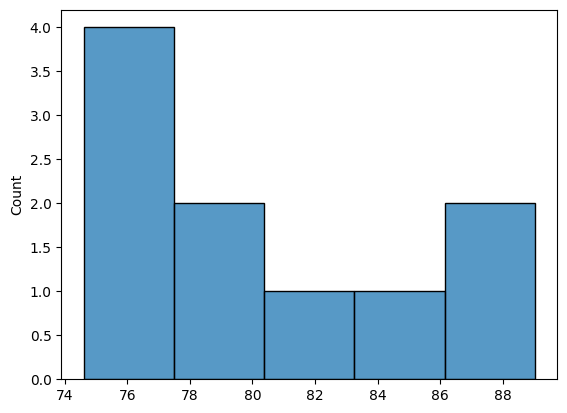

In [12]:
# sns.distplot(na_sample, bins=5)
sns.histplot(na_sample, bins=5)

### Kvantil-kvantilový graf (QQ graf, angl. *QQ-plot*)

...je vizuálna metóda na určenie, či dve dátove sady pochádzajú z rovnakého rozdelenia. Najčastejšie sa porovnáva rozdelenie vzorky s teoretickým normálnym rozdelením. Bod na grafe zobrazuje hodnotu kvantilu v prvom a druhom porovnávanom datasete.

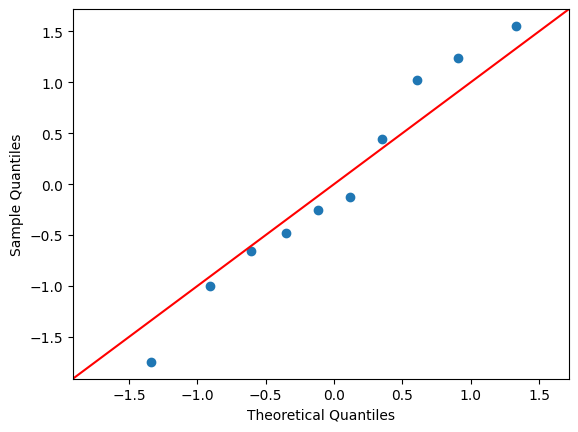

In [13]:
_ = sm.ProbPlot(a_sample, fit=True).qqplot(line='45')

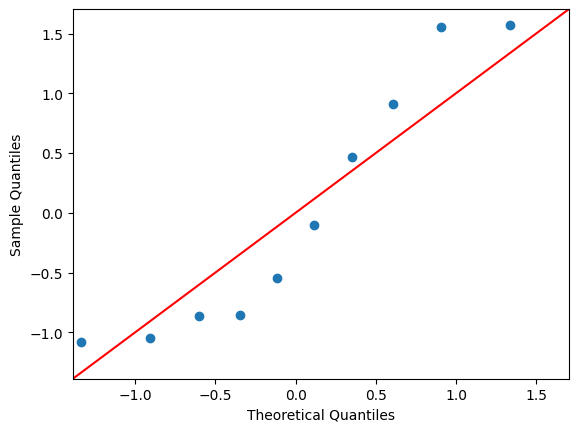

In [14]:
_ = sm.ProbPlot(na_sample, fit=True).qqplot(line='45')

### Ako interpretovať QQ graf?

<img src="https://i.stack.imgur.com/ZXRkL.png" />

Zdroj: https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

### Shapiro-Wilkov test normálnosti

- Shapiro-Wilkov test testuje nulovú hypotézu, že dáta pochádzajú z normálneho rozdelenia.
- Ak je $p < 0,05$, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdelenia. Ak je $p > 0,05$, nulovú hypotézu nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelenia.
- `scipy.stats.shapiro`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [15]:
stats.shapiro(a_sample)

ShapiroResult(statistic=0.9674149751663208, pvalue=0.8658978939056396)

In [16]:
stats.shapiro(na_sample)

ShapiroResult(statistic=0.8645601272583008, pvalue=0.086341992020607)

## Test rovnakých variancií - Levenov test

- Levenov test testuje nulovú hypotézu, že všetky vstupné vzorky pochádzajú z rozdelení s rovnakými varianciami.
- Ak nulovú hypotézu nezamietame ($p > 0,05$), znamená to, že na základe dát nemôžeme prehlásiť, že by vzorky pochádzali z distribúcií s rôznymi varianciami.

**Nedokázali sme tým však, že priemery sú rovnaké.**

## Ako je to možné?

Dáta sme generovali z rozdelení s rôznym priemerom.

**Chyba 2. rádu** - použili sme test s nedostatočnou silou.

# Štatistická sila = $1 - \beta$

- Pravdepodobnosť, že nájdeme signifikantný rozdiel, ak exituje (zamietame $H_0$, keď je nepravdivá).
- Pri nízkej sile testu nevieme identifikovať menšie efekty (rozdiely).
- Vieme zvýšiť zväčšením počtu účastníkov (pozorovaní).

## Silu testu, resp. potrebný počet účastníkov/pozorovaní vieme dopredu vypočítať!

- Potrebujeme na to odhadnúť *veľkosť efektu*.
- Viacero spôsobov, napr. **Cohenovo d**.

## $d = \frac{\overline{x_1} - \overline{x_2}}{s}$

pričom

## $s = \sqrt{\frac{(n_1 - 1) s^2_{X_1} + (n_2 - 1) s^2_{X_2}}{n_1 + n_2  - 2}}$

- malý efekt = 0,2, stredný efekt = 0,5, veľký efekt = 0,8

## V našom príklade rozdiel je, ale neboli sme schopní ho odmerať

Mali sme len 10 pozorovaní


In [17]:
def cohen_d(x1, x2):
    nx1 = len(x1)
    nx2 = len(x2)
    s = np.sqrt(((nx1-1) * np.std(x1, ddof=1)**2 + (nx2-1) * np.std(x2, ddof=1)**2) / (nx1 + nx2 - 2))
    return (np.abs(np.mean(x1) - np.mean(x2))) / s

In [18]:
c_d = cohen_d(a_sample, na_sample)
c_d

0.29983870343763525

In [19]:
sm_stats.power.tt_ind_solve_power(c_d, len(a_sample), 0.05, None, 1)

0.09737259224363674

`statsmodels.stats.power.tt_ind_solve_power`:
https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html

## V literatúre sa vo všeobecnosti považuje za akceptovateľnú sila 0,8

In [20]:
sm_stats.power.tt_ind_solve_power(c_d, None, 0.05, 0.8, 1)

175.57237278066972

V skutočnosti by nám stačilo menej pozorovaní (keďže sme dáta generovali, poznáme skutočné hodnoty priemerov a smerodajnej odchýlky):

In [21]:
sm_stats.power.tt_ind_solve_power((m1-m2)/s, None, 0.05, 0.8, 1)

99.08032683981143

## t-test znovu, tentokrát s väčším počtom pozorovaní (100 študentov pre každú skupinu)

In [22]:
a_sample2 = attended.rvs(100)
na_sample2 = not_attended.rvs(100)

In [23]:
a_sample2.mean()

79.98243792881826

In [24]:
na_sample2.mean()

78.08512573238116

In [25]:
plt.rcParams["figure.figsize"] = (10,7)

<AxesSubplot: xlabel='attended', ylabel='score'>

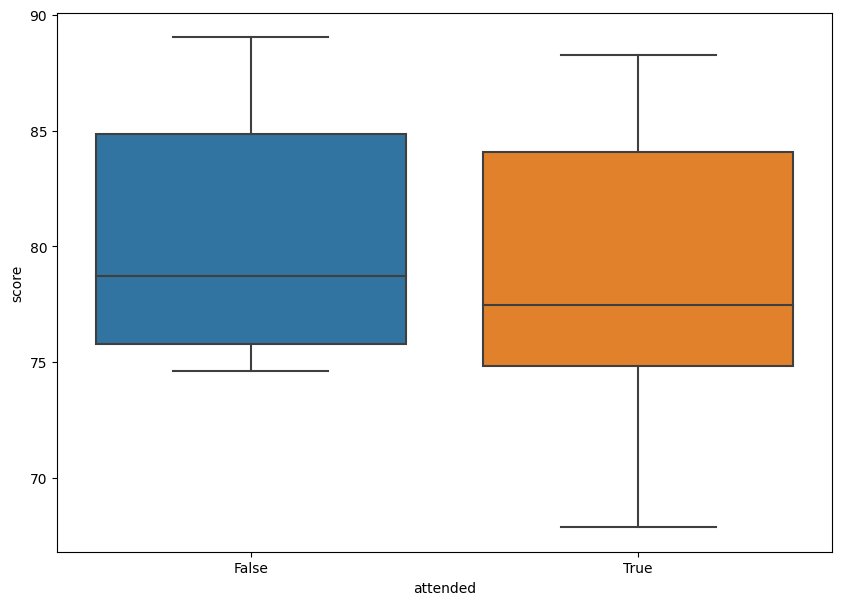

In [26]:
df2 = pd.DataFrame({'attended': np.repeat([True, False], 100), 'score': np.concatenate((a_sample2, na_sample2))})
sns.boxplot(x=df['attended'], y=df['score'])

In [27]:
stats.ttest_ind(a_sample2, na_sample2)

Ttest_indResult(statistic=2.632935293205359, pvalue=0.009133081657394739)

## Na základe t-testu zamietame nulovú hypotézu

Ale odhady priemerov stále nezodpovedajú skutočným hodnotám.

*Ako zistiť presnosť tohto odhadu, resp. aká je skutočná hodnota priemeru?*

**Intervaly spoľahlivosti**

## Intervaly spoľahlivosti

Miera spoľahlivosti $C$ (napr. 95%) nám hovorí, v koľkých percentách zostavených intervalov spoľahlivosti by sa nachádzala skutočná odhadovaná hodnota populácie (napr. priemer), ak by som z populácie testoval nekonečne veľa vzoriek.

Pre neznámu smerodajnú odchýlku používame hodnoty z t-distribúcie:

$ \overline{x} \pm t_{\alpha}(n-1)\frac{s}{\sqrt{n}} $

$ \alpha = \frac{1-C}{2} $

## Príklad: prieskum verejnej mienky

<img src="img/election-poll2.png" alt="Confidence intervals in an election poll" width="25%"/>

In [28]:
sms.DescrStatsW(a_sample).tconfint_mean()

(73.99122651163154, 83.31361238510519)

In [29]:
sms.DescrStatsW(na_sample).tconfint_mean()

(76.39447730971264, 84.58903843265645)

In [30]:
plt.rcParams["figure.figsize"] = (6,4)

<AxesSubplot: xlabel='attended', ylabel='score'>

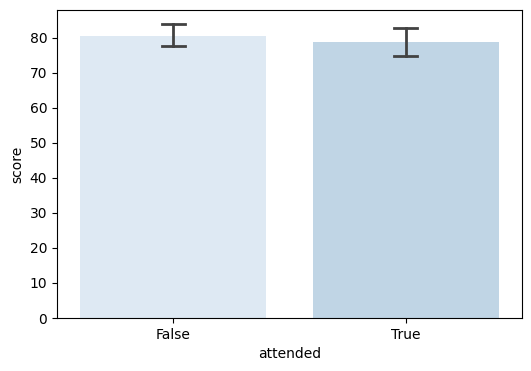

In [31]:
sns.barplot(x='attended', y='score', data=df, capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

In [32]:
sms.DescrStatsW(a_sample2).tconfint_mean()

(78.85233249993219, 81.11254335770433)

In [33]:
sms.DescrStatsW(na_sample2).tconfint_mean()

(77.20916499630897, 78.96108646845337)

<AxesSubplot: xlabel='attended', ylabel='score'>

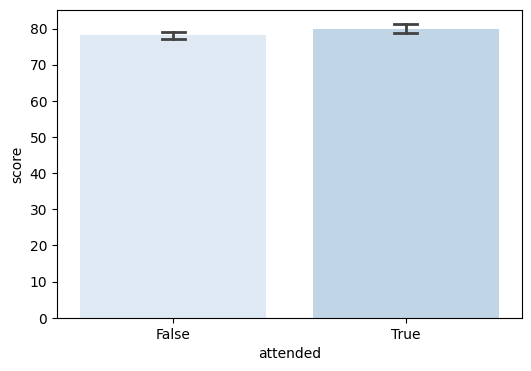

In [34]:
sns.barplot(x='attended', y='score', data=df2, capsize=0.1, errwidth=2, palette=sns.color_palette("Blues"))

## V našom príklade sme mali dve skupiny - čo ak by sme ich mali viac?

$\alpha = 0.05$

* 1 test: 5% pravdepodobnosť chyby
* 2 testy: $1 – (1-0,05)^2 \approx 9.75\%$ pravd. chyby
* 10 testov: $1 – (1-0,05)^{10} \approx 40.1\%$ pravd. chyby
* 25 testov: $1 – (1-0,05)^{25} \approx 72.3\%$ pravd. chyby

## S rastúcim počtom testovaných skupín rastie chyba 1. rádu

### Chyby 1. rádu môžeme kontrolovať

**FWER (Familywise error rate)** = Pravdepodobnosť, že zamietneme aspoň jednu pravdivú $H_i$ (*spravíme chybu 1. rádu*) pri testovaní skupiny nulových hypotéz

**Bonferroniho korekcia** 

$p_i \leq \alpha/m$, kde $m$ je počet hypotéz (párových testov)

Majme 4 testovacie podmienky, $\alpha = 0.05$ => 6 párových testov, $p_i \leq 0.05/6 = 0.0083$

*Alebo ešte lepšie - použiť test pre viacero skupín (napr. ANOVA) v kombinácii s párovými post-hoc testami.*

## Reportovať p-hodnotu nestačí
- Hovorí len o tom, či existuje nejaký efekt
- Je závislá od veľkosti vzorky; pri dostatočne veľkých vzorkách takmer vždy zistíme signifikantný rozdiel
- Treba reportovať aj **veľkosť efektu**. http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3444174

### t-test znovu, tentokrát s väčším počtom pozorovaní (100000 študentov pre každú skupinu)

In [35]:
attended2 = stats.norm(80, 5)
not_attended2 = stats.norm(79.9, 5)

a_sample3 = attended2.rvs(100000)
na_sample3 = not_attended2.rvs(100000)

In [36]:
a_sample3.mean()

80.00676932496977

In [37]:
na_sample3.mean()

79.9229616181292

In [38]:
# stats.ttest_ind(a_sample3, na_sample3)
stat, p = stats.ttest_ind(a_sample3, na_sample3)
print('Ttest_indResult: statistic=', stat, 'pvalue=', p)

Ttest_indResult: statistic= 3.7521883658339537 pvalue= 0.00017534714097220807


### Interpretácia

In [39]:
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Different distributions (reject H0)


v doméne: **$H_0$ = Priemerné finálne hodnotenie študentov, čo chodili na prednášky, je rovnaké ako tých, čo na prednášky nechodili.**

### Zamietame $H_0$ (Reject $H_0$) na základe výsledku t-testu s väčšími dvoma vzorkami !!!

###  *t-test* ešte raz

$H_0$ =  the means of two populations are equal

Fail to Reject $H_0$: No difference between the sample means

Reject $H_0$: Some difference between the sample means

## You can already use statistics to test hypotheses :)
<!--
#### Next step: Bayesian inference
- Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available.
//-->

## Online kurzy

- Statistical Inference (https://www.coursera.org/learn/statistical-inference; súčasť *Data Science* špecializácie)
- Statistics with Python Specialization (https://www.coursera.org/specializations/statistics-with-python)
- Introduction to Statistics as Covered in the Social, Behavioral, and Natural Sciences (https://www.udemy.com/course/introduction-to-statistics/)
- Statistics for Business Analytics and Data Science A-Z (https://www.udemy.com/course/data-statistics/)
- Statistics (Khan Academy): https://www.youtube.com/playlist?list=PL1328115D3D8A2566

## References
- Brian Caffo: Little Inference Book (https://leanpub.com/LittleInferenceBook)
- Alex Reinhard: Statistics Done Woefully Wrong (https://www.statisticsdonewrong.com/)
- Will Kurt: Bayesian Statistics the Fun Way (https://nostarch.com/learnbayes)
- https://github.com/FIIT-IAU